<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-5/blob/master/Challenge_What_test_to_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: What test to use

Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

This will guide one to choose the correct test depending on your question and data type.
[REFERENCE](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/)



In [0]:
import pandas as pd
import numpy as np
from scipy import stats 

import matplotlib.pyplot as plt
import seaborn as sns


## importing data

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# change some encoding for graphics later
df['year']=np.where(df['year']==6,2012,2014)
df['gndr']=np.where(df['gndr']==1,'Male','Female')

df['partner']  = np.where(df['partner']==1,'Lives with Partner','Does not')


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8594 non-null object
agea       8355 non-null float64
partner    8594 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 872.9+ KB


In [0]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr         0
agea       239
partner      0
dtype: int64

In [0]:
df.fillna(inplace=True,method='ffill')

df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [0]:
df.groupby(['cntry','year']).describe()

idno                                                      \
             count          mean          std         min          25%   
cntry year                                                               
CH    2012   773.0  1.480680e+03   837.085069         5.0       761.00   
      2014   773.0  1.480680e+03   837.085069         5.0       761.00   
CZ    2012   658.0  1.445666e+03   368.654806      1001.0      1169.25   
      2014   658.0  1.445666e+03   368.654806      1001.0      1169.25   
DE    2012    14.0  1.100048e+07   506.292818  11000031.0  11000101.00   
      2014    14.0  1.100048e+07   506.292818  11000031.0  11000101.00   
ES    2012  1213.0  1.467607e+03   818.301231         1.0       807.00   
      2014  1213.0  1.467607e+03   818.301231         1.0       807.00   
NO    2012   731.0  1.430671e+04  4672.042957      6312.0     10347.00   
      2014   731.0  1.430671e+04  4672.042957      6312.0     10347.00   
SE    2012   908.0  1.765173e+03  1098.083963         7.0       788.50   
      2014   908.0  1.765173e+03  1098.083963         7.0       788.50   

                                                  tvtot            ... sclact  \
                   50%          75%         max   count      mean  ...    75%   
cntry year                                                         ...          
CH    2012      1432.0      2243.00      2905.0   773.0  3.143596  ...    3.0   
      2014      1432.0      2243.00      2905.0   773.0  3.065977  ...    3.0   
CZ    2012      1333.5      1500.75      2151.0   658.0  5.141337  ...    3.0   
      2014      1333.5      1500.75      2151.0   658.0  4.686930  ...    3.0   
DE    2012  11000271.0  11000833.50  11001431.0    14.0  4.928571  ...    3.0   
      2014  11000271.0  11000833.50  11001431.0    14.0  3.071429  ...    3.0   
ES    2012      1456.0      2175.00      2865.0  1213.0  3.977741  ...    3.0   
      2014      1456.0      2175.00      2865.0  1213.0  4.016488  ...    3.0   
NO    2012     14346.0     18558.00     22428.0   731.0  3.837209  ...    3.0   
      2014     14346.0     18558.00     22428.0   731.0  3.705882  ...    3.0   
SE    2012      1585.0      2733.75      3746.0   908.0  3.691630  ...    3.0   
      2014      1585.0      2733.75      3746.0   908.0  3.585903  ...    3.0   

                   agea                                                         
            max   count       mean        std   min    25%   50%    75%    max  
cntry year                                                                      
CH    2012  5.0   773.0  47.316947  18.440822  16.0  32.00  47.0  60.00   94.0  
      2014  5.0   773.0  46.157827  18.760515  16.0  32.00  45.0  60.00   92.0  
CZ    2012  5.0   658.0  47.031915  17.419365  16.0  34.00  47.0  60.00   91.0  
      2014  5.0   658.0  45.545593  16.320101  15.0  34.00  45.0  58.00   87.0  
DE    2012  5.0    14.0  52.071429  16.578319  26.0  38.00  54.0  61.25   75.0  
      2014  4.0    14.0  59.714286  15.162852  36.0  49.75  56.5  66.50   89.0  
ES    2012  5.0  1213.0  47.830173  17.702926  16.0  35.00  46.0  61.00  103.0  
      2014  5.0  1213.0  47.925804  18.633900  16.0  33.00  47.0  61.00  101.0  
NO    2012  5.0   731.0  46.392613  17.823961  15.0  32.00  46.0  60.00   93.0  
      2014  5.0   731.0  46.584131  18.537543  15.0  32.00  47.0  60.50   94.0  
SE    2012  5.0   908.0  49.591410  19.382684  15.0  33.00  51.0  67.00   96.0  
      2014  5.0   908.0  50.101322  19.882807  15.0  33.00  52.0  67.00  114.0  

[12 rows x 72 columns]

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr         0
agea       239
partner      0
dtype: int64

# Quick Summary


So what can we do here we have a few issues.


1.   Ordinal Data
2.   Missing Data
3.   Data is not typically normally distributed

Because our data is ordinal it cuts down the types of tests of significance at our disposal. I'll be choosing the Wilcoxon signed ranks test as it works with ordinal data. However, because there is missing data we have to deal with that in order to use the test.

As for missing data I'll be imputing data with a forward fill method. Some may find this fairly unsatisfactory, however in our case we have only a few missing values in the features we are testing. The majority of missing data is in the age feature which is unused in this analysis anyway.

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

**ppltrst**: Most people can be trusted or you can't be too careful

Survey Question:

All rounds: Using this card, generally speaking, would you say that most people can be trusted, or that you can't be too careful in dealing with people? Please tell me on a score of 0 to 10, where 0 means you can't be too careful and 10 means that most people can be trusted.





In [0]:
dd = pd.melt(df,id_vars=['cntry','year'],value_vars=['ppltrst'],value_name='Trust index')


In [0]:
df_year_cntry = df.groupby(['cntry','year'])['ppltrst'].describe().reset_index()

df_year_cntry

,cntry,year,count,mean,std,min,25%,50%,75%,max
0,CH,2012,773.0,5.677878,2.130701,0.0,4.00,6.0,7.0,10.0
1,CH,2014,773.0,5.751617,2.143888,0.0,5.00,6.0,7.0,10.0
2,CZ,2012,658.0,4.351064,2.428241,0.0,3.00,4.0,6.0,10.0
3,CZ,2014,658.0,4.424012,2.303693,0.0,3.00,5.0,6.0,10.0
4,DE,2012,14.0,5.214286,1.528125,3.0,4.25,5.0,6.5,8.0
5,DE,2014,14.0,5.357143,2.530039,2.0,3.25,5.5,7.0,10.0
6,ES,2012,1213.0,5.114592,2.183623,0.0,4.00,5.0,7.0,10.0
7,ES,2014,1213.0,4.893652,2.148236,0.0,3.00,5.0,6.0,10.0
8,NO,2012,731.0,6.651163,1.749382,0.0,5.00,7.0,8.0,10.0
9,NO,2014,731.0,6.599179,1.810002,0.0,5.00,7.0,8.0,10.0


## Check for Outliers

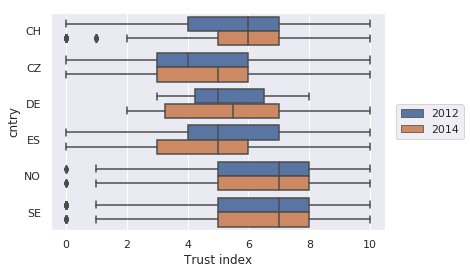

In [0]:
sns.set()
g = sns.boxplot(y='cntry',x='Trust index',data=dd,orient ='h',hue='year')

g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

Looking by country we can observe that outliers exist in six of the twelve sets.

## Check for Normality

In [0]:
def shapiro(df):
  cntry_list = df['cntry'].unique()
  results = []
  for x in cntry_list:
    pop_1 = df.loc[(df['cntry']==x) & (df['year']==2012),['ppltrst']]
    pop_2 = df.loc[(df['cntry']==x) & (df['year']==2014),['ppltrst']]
    normal_1 = stats.shapiro(pop_1)
    normal_2 = stats.shapiro(pop_2)
    results.extend([normal_1,normal_2,x])
  return results

In [0]:
shapiro(df)

[(0.9519361853599548, 3.4958809444132896e-15),
 (0.9538647532463074, 7.692136586977955e-15),
 'CH',
 (0.9672042727470398, 5.764026062005101e-11),
 (0.972077488899231, 7.064237528275896e-10),
 'CZ',
 (0.9013110399246216, 0.1178363636136055),
 (0.9425466060638428, 0.4519253373146057),
 'DE',
 (0.9496549367904663, 5.989953442559737e-20),
 (0.9663659930229187, 3.734396740272391e-16),
 'ES',
 (0.9209728240966797, 4.0887095653856325e-19),
 (0.9294818639755249, 4.779899979174929e-18),
 'NO',
 (0.9354179501533508, 2.1889822721658554e-19),
 (0.9398238658905029, 1.0416553104982269e-18),
 'SE']

Intrupting the results above suggest that checking for normality on data that is essentially categorical is a bad idea as groups with low samples size such as Germany appear to be more normal looking than other countries with higher sample sizes such as Spain, this effect is shown in the QQ plots below. 

This rules our using any type of paired T-Tests as they rely on normality and the same sample size for each group which we don't have.



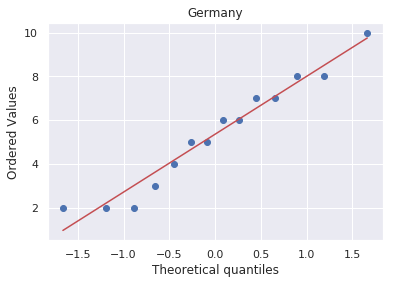

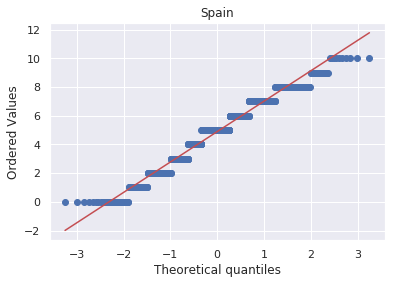

In [0]:
DE = df.loc[(df['cntry']=='DE') & (df['year']==2014),['ppltrst']]['ppltrst']
ES = df.loc[(df['cntry']=='ES') & (df['year']==2014),['ppltrst']]['ppltrst']
stats.probplot(DE, plot= plt)
plt.title('Germany')

plt.show() 
stats.probplot(ES, plot= plt)
plt.title('Spain')

plt.show() 

In [0]:
# Country wise pair wilcox rank



def w_test(df,feature):
  cntry_list = df['cntry'].unique()
  results = pd.DataFrame()
  for x in cntry_list:
    pop_1 = df.loc[(df['cntry']==x) & (df['year']==2012),[feature]][feature]
    pop_2 = df.loc[(df['cntry']==x) & (df['year']==2014),[feature]][feature]
    wilcoxon = stats.wilcoxon(pop_1,pop_2)
    print(x,wilcoxon)
  #print(results)
  

In [184]:
#make list of countries seperate data from df first by country then slice by year and run t test

w_test(df,'ppltrst')


CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)
CZ WilcoxonResult(statistic=84794.0, pvalue=0.5641115093487992)
DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
ES WilcoxonResult(statistic=243539.5, pvalue=0.006620811174635592)
NO WilcoxonResult(statistic=85778.5, pvalue=0.6813525825832041)
SE WilcoxonResult(statistic=131441.5, pvalue=0.038526003902573915)


## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [188]:
# Summary Stats
df.groupby(['cntry','year']).describe()['happy']

count      mean       std  min   25%  50%   75%   max
cntry year                                                        
CH    2012   773.0  8.087969  1.436036  0.0  7.00  8.0  9.00  10.0
      2014   773.0  8.116429  1.405725  0.0  7.00  8.0  9.00  10.0
CZ    2012   658.0  6.781155  2.049794  0.0  5.00  7.0  8.00  10.0
      2014   658.0  6.917933  1.899118  0.0  6.00  7.0  8.00  10.0
DE    2012    14.0  7.428571  1.650841  4.0  6.25  8.0  8.00  10.0
      2014    14.0  7.857143  1.292412  5.0  7.25  8.0  8.75  10.0
ES    2012  1213.0  7.549876  1.912749  0.0  7.00  8.0  9.00  10.0
      2014  1213.0  7.419621  1.871581  0.0  7.00  8.0  9.00  10.0
NO    2012   731.0  8.251710  1.424677  0.0  8.00  8.0  9.00  10.0
      2014   731.0  7.915185  1.581027  0.0  7.00  8.0  9.00  10.0
SE    2012   908.0  7.907489  1.520978  1.0  7.00  8.0  9.00  10.0
      2014   908.0  7.946035  1.408885  3.0  7.00  8.0  9.00  10.0

In [0]:

dd_happy = pd.melt(df,id_vars=['cntry','year'],value_vars=['happy'],value_name='happy')

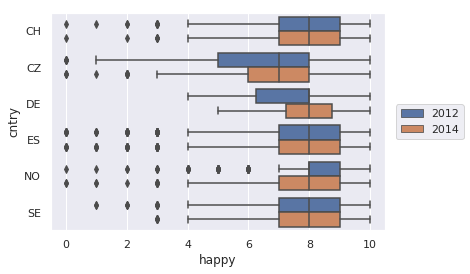

In [186]:
sns.set()
g = sns.boxplot(y='cntry',x='happy',data=dd_happy,orient ='h',hue='year')

g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [187]:
w_test(df,'happy')

CH WilcoxonResult(statistic=93043.5, pvalue=0.9182815996614322)
CZ WilcoxonResult(statistic=78569.0, pvalue=0.2545298863954758)
DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES WilcoxonResult(statistic=232447.5, pvalue=0.055803287639812287)
NO WilcoxonResult(statistic=68447.5, pvalue=1.0142278074830803e-05)
SE WilcoxonResult(statistic=126903.5, pvalue=0.6938040837018453)


## Who reported watching more TV in 2012, men or women?




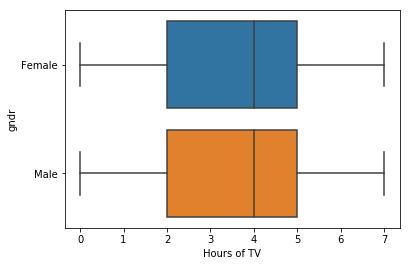

In [0]:
dd_tv = pd.melt(df,id_vars=['gndr'],value_vars=['tvtot'],value_name='Hours of TV')

sns.boxplot(y='gndr',x='Hours of TV',data=dd_tv,orient ='h')


In [0]:
pd.DataFrame(dd_tv[dd_tv['gndr']=='Female']['Hours of TV']).describe(),pd.DataFrame(dd_tv[dd_tv['gndr']=='Male']['Hours of TV']).describe()

(       Hours of TV
 count  4064.000000
 mean      3.863435
 std       2.026116
 min       0.000000
 25%       2.000000
 50%       4.000000
 75%       5.000000
 max       7.000000,        Hours of TV
 count  4109.000000
 mean      3.781455
 std       1.996208
 min       0.000000
 25%       2.000000
 50%       4.000000
 75%       5.000000
 max       7.000000)






## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?



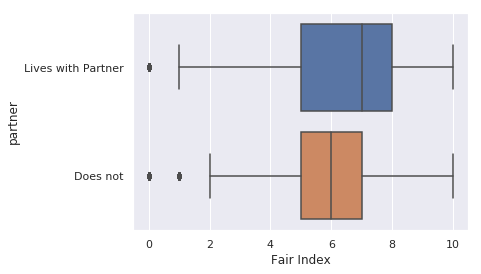

In [0]:
dd_partner_fair = pd.melt(df[df['year']==2012],id_vars=['partner'],value_vars=['pplfair'],value_name='Fair Index')

sns.boxplot(y='partner',x='Fair Index',data=dd_partner_fair,orient ='h')






## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


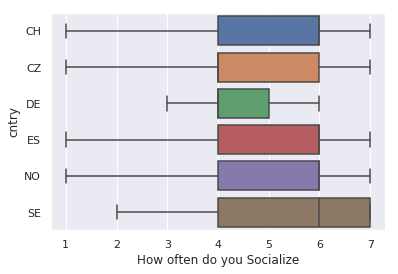

In [0]:
dd_sclmeet =  pd.melt(df[df['year']==2014],id_vars=['cntry'],value_vars=['sclmeet'],value_name='How often do you Socialize')

sns.boxplot(y='cntry',x='How often do you Socialize',data=dd_sclmeet,orient ='h')

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


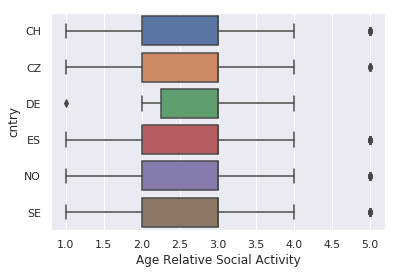

In [0]:
dd_sclact = pd.melt(df[df['year']==2014],id_vars=['cntry'],value_vars=['sclact'],value_name='Age Relative Social Activity')

sns.boxplot(y='cntry',x='Age Relative Social Activity',data=dd_sclact,orient ='h')

In [0]:
df[df['year']==2014].groupby(['year','cntry'])['sclact'].describe()

count      mean       std  min   25%  50%  75%  max
year cntry                                                      
2014 CH      743.0  2.784657  0.906360  1.0  2.00  3.0  3.0  5.0
     CZ      622.0  2.729904  0.838509  1.0  2.00  3.0  3.0  5.0
     DE       14.0  2.714286  0.726273  1.0  2.25  3.0  3.0  4.0
     ES     1137.0  2.631486  0.949700  1.0  2.00  3.0  3.0  5.0
     NO      713.0  2.858345  0.823371  1.0  2.00  3.0  3.0  5.0
     SE      867.0  2.878893  0.859859  1.0  2.00  3.0  3.0  5.0